## Traitement des données

### 🧾 Description des colonnes principales

#### 🔑 Identifiants et cible

* **`SK_ID_CURR`** : Identifiant unique du client.
* **`TARGET`** : Variable cible indiquant si le prêt a été remboursé (0) ou non (1).

#### 👤 Informations personnelles

* **`NAME_CONTRACT_TYPE`** : Type de contrat (par exemple, prêt en espèces).
* **`CODE_GENDER`** : Sexe du client (`M`, `F`, ou `X`).
* **`FLAG_OWN_CAR`** : Possession d'une voiture (`Y` ou `N`).
* **`FLAG_OWN_REALTY`** : Possession d'un bien immobilier (`Y` ou `N`).
* **`CNT_CHILDREN`** : Nombre d'enfants à charge.
* **`NAME_TYPE_SUITE`** : Qui accompagne le client lors de la demande (par exemple, seul, famille).
* **`NAME_INCOME_TYPE`** : Type de revenu (par exemple, salarié, retraité).
* **`NAME_EDUCATION_TYPE`** : Niveau d'éducation.
* **`NAME_FAMILY_STATUS`** : Situation familiale.
* **`NAME_HOUSING_TYPE`** : Type de logement (par exemple, maison, appartement).
* **`OCCUPATION_TYPE`** : Profession du client.
* **`CNT_FAM_MEMBERS`** : Nombre de membres de la famille.

#### 💰 Informations financières

* **`AMT_INCOME_TOTAL`** : Revenu annuel total.
* **`AMT_CREDIT`** : Montant du crédit demandé.
* **`AMT_ANNUITY`** : Montant de l'annuité du prêt.
* **`AMT_GOODS_PRICE`** : Prix des biens pour lesquels le prêt est demandé.

#### 📅 Informations temporelles

* **`DAYS_BIRTH`** : Âge du client en jours (négatif).
* **`DAYS_EMPLOYED`** : Nombre de jours d'emploi (négatif).
* **`DAYS_REGISTRATION`** : Nombre de jours depuis l'enregistrement du client.
* **`DAYS_ID_PUBLISH`** : Nombre de jours depuis la dernière modification de l'identifiant.
* **`OWN_CAR_AGE`** : Âge de la voiture en années.

#### 📍 Informations géographiques

* **`REGION_POPULATION_RELATIVE`** : Population relative de la région.
* **`REGION_RATING_CLIENT`** : Évaluation de la région par le client.
* **`REGION_RATING_CLIENT_W_CITY`** : Évaluation de la région avec la ville.
* **`WEEKDAY_APPR_PROCESS_START`** : Jour de la semaine du début du processus de demande.
* **`HOUR_APPR_PROCESS_START`** : Heure du début du processus de demande.

#### 📞 Informations de contact

* **`FLAG_MOBIL`** : Possession d'un téléphone mobile.
* **`FLAG_EMP_PHONE`** : Possession d'un téléphone professionnel.
* **`FLAG_WORK_PHONE`** : Possession d'un téléphone de travail.
* **`FLAG_CONT_MOBILE`** : Utilisation continue du mobile.
* **`FLAG_PHONE`** : Possession d'un téléphone.
* **`FLAG_EMAIL`** : Possession d'une adresse e-mail.

#### 🏢 Informations sur le logement

* **`APARTMENTS_AVG`**, **`BASEMENTAREA_AVG`**, **`YEARS_BUILD_AVG`**, etc. : Informations moyennes sur le logement (surface, année de construction, etc.).

#### 📄 Documents fournis

* **`FLAG_DOCUMENT_2`** à **`FLAG_DOCUMENT_21`** : Indicateurs de documents fournis par le client.

#### 📊 Sources externes

* **`EXT_SOURCE_1`**, **`EXT_SOURCE_2`**, **`EXT_SOURCE_3`** : Scores externes d'évaluation du risque.

#### 🔁 Historique de crédit

* **`AMT_REQ_CREDIT_BUREAU_HOUR`**, **`AMT_REQ_CREDIT_BUREAU_DAY`**, etc. : Nombre de demandes de crédit auprès du bureau de crédit sur différentes périodes.


Le traitement des données se fait comme suit :  
    - Charger les données  
    - Supprimer les colonnes null  > 50 %  
    - Encoder les var catégorielles  
    - Imputer les donnéees < 50 %    
    - Supprimer les var corrélées - PCA  
    - Normaliser et standardiser  


### Les librairies importées

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [80]:
# Pouvoir afficher toutes les sorties
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 0)

### Chargement des données

In [81]:
app_train = pd.read_csv('D:/IPSSI/Cours/ML&IA/Projet/application_train.csv')
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Gestion des NaN

#### Suppression des colonnes avec Nan > 50 %

In [82]:
app_train.shape
# #Ici, on n'apas la colonne target
# X_test.shape

(307511, 122)

In [83]:
app_train.isna().mean()*100
# On drop les colonnes avec plus de 50% de valeurs null
seuil = 0.5  # 50%
app_train_cleaned = app_train.loc[:, app_train.isnull().mean() < seuil]

In [84]:
# On retombe à 81 colonnes après la suppression des colonnes à 50% de valeurs nulles
app_train_cleaned.shape

(307511, 81)

### Encodage des variables catégorielles

In [85]:
num_vars = app_train_cleaned.select_dtypes(include=['float64'])

In [86]:
# Les colonnes catégorielles à encoder
# Afficher les valeurs uniques pour chaque colonnes catégorielles, pour celles qui ont 2 val : on utilise le label encoder et pour les autres le hot encoding
for col in app_train_cleaned.select_dtypes('O').columns.to_list():
    print ( col, ' ', app_train_cleaned[col].nunique(), app_train_cleaned[col].unique())

NAME_CONTRACT_TYPE   2 ['Cash loans' 'Revolving loans']
CODE_GENDER   3 ['M' 'F' 'XNA']
FLAG_OWN_CAR   2 ['N' 'Y']
FLAG_OWN_REALTY   2 ['Y' 'N']
NAME_TYPE_SUITE   7 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE   8 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE   5 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS   6 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE   6 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE   18 ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 '

On peut remarquer qu'il y a dans les colonnes une valeur 'XNA' qui est un NaN déguisé, dont il faut se débarasser.

In [87]:
# Remplacer les XNA par NaN, comme ça : on remplace aussi
cat_features = app_train_cleaned.select_dtypes(include=['object']).columns
for col in cat_features:
    app_train_cleaned[col].replace('XNA', np.nan, inplace=True)

C:\Users\kheli\AppData\Local\Temp\ipykernel_95392\355803949.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_train_cleaned[col].replace('XNA', np.nan, inplace=True)
C:\Users\kheli\AppData\Local\Temp\ipykernel_95392\355803949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_train_cleaned[col].replace('XNA', np.nan, inplace=True)


In [88]:
# Encodage des var catégorielles avec 2 classes
label_encoder = preprocessing.LabelEncoder()

for col in app_train_cleaned:
    if app_train_cleaned[col].dtype == 'object':
        if len(list(app_train_cleaned[col].unique())) <= 2:
            label_encoder.fit(app_train_cleaned[col])
            app_train_cleaned[col] = label_encoder.transform(app_train_cleaned[col])

C:\Users\kheli\AppData\Local\Temp\ipykernel_95392\3190876470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_train_cleaned[col] = label_encoder.transform(app_train_cleaned[col])
C:\Users\kheli\AppData\Local\Temp\ipykernel_95392\3190876470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_train_cleaned[col] = label_encoder.transform(app_train_cleaned[col])
C:\Users\kheli\AppData\Local\Temp\ipykernel_95392\3190876470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [89]:
# Encodage des var catégorielles avec + 2 classes
for col in app_train_cleaned:
    if app_train_cleaned[col].dtype == 'object':
        if len(list(app_train_cleaned[col].unique())) > 2:
            app_train_encod = pd.get_dummies(app_train_cleaned, dtype=int)

In [90]:
# On passe à 246 variables
app_train_encod.shape

(307511, 189)

### Train and test split

On sépare le dataset en train, test et val (pour nos tests à la mano)

In [91]:
X = app_train_encod.drop(columns=['TARGET'])  # Features
y = app_train_encod['TARGET']                # Cible

# 1. Séparation initiale : train (70%) vs temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 2. Séparation de temp : validation (15%) vs test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp
)

In [92]:
X_test.shape

(61503, 188)

#### Imputation des colonnes avec Nan < 50 %

In [93]:
# knn_imputer = KNNImputer(n_neighbors=2)
# X_train_emputed = knn_imputer.fit_transform(X_train)
# X_train_emputed = pd.DataFrame(X_train_emputed)
# X_train_emputed

In [94]:
# On remplace par la médiane en attendant
X_train_emputed = X_train.fillna(X_train.median())
X_test_emputed = X_test.fillna(X_test.median())

In [95]:
X_train_emputed.isna().mean() * 100

SK_ID_CURR                                           0.0
NAME_CONTRACT_TYPE                                   0.0
FLAG_OWN_CAR                                         0.0
FLAG_OWN_REALTY                                      0.0
CNT_CHILDREN                                         0.0
AMT_INCOME_TOTAL                                     0.0
AMT_CREDIT                                           0.0
AMT_ANNUITY                                          0.0
AMT_GOODS_PRICE                                      0.0
REGION_POPULATION_RELATIVE                           0.0
DAYS_BIRTH                                           0.0
DAYS_EMPLOYED                                        0.0
DAYS_REGISTRATION                                    0.0
DAYS_ID_PUBLISH                                      0.0
FLAG_MOBIL                                           0.0
FLAG_EMP_PHONE                                       0.0
FLAG_WORK_PHONE                                      0.0
FLAG_CONT_MOBILE               

### Gestion des classes deséquillibrées

<Axes: ylabel='count'>

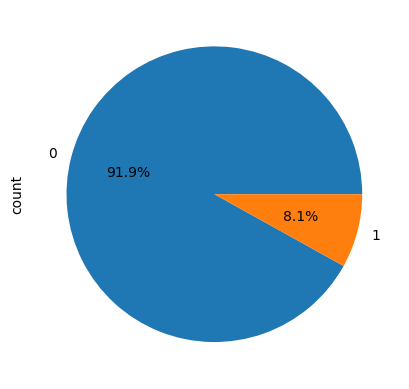

In [96]:
#On est sur un cas de déséquillibre : 91 vs 8 %
app_train['TARGET'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [97]:
# Utiliser RandomOverSampler pour suréchantillonner la classe minoritaire
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_emputed, y_train)

<Axes: ylabel='count'>

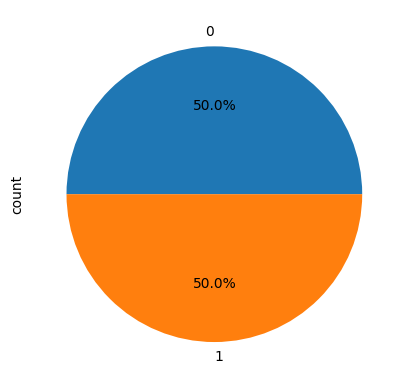

In [98]:
y_train_resampled.value_counts().plot(kind='pie',autopct='%1.1f%%')

### Normalisation et standardisation des données

In [99]:
# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.fit_transform(X_test_emputed)

In [100]:
X_train_scaled

array([[ 0.06750796, -0.29837377,  1.44313933, ..., -0.06043059,
         1.02470367, -0.08965843],
       [-0.84078423, -0.29837377, -0.69293379, ..., -0.06043059,
        -0.97589189, -0.08965843],
       [ 0.88867175, -0.29837377, -0.69293379, ..., -0.06043059,
        -0.97589189, -0.08965843],
       ...,
       [ 1.49234573, -0.29837377, -0.69293379, ..., -0.06043059,
        -0.97589189, -0.08965843],
       [-0.33577264, -0.29837377, -0.69293379, ..., -0.06043059,
        -0.97589189, -0.08965843],
       [-0.14996236, -0.29837377, -0.69293379, ..., -0.06043059,
         1.02470367, -0.08965843]])

In [101]:
# Normalisation
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_resampled)
X_test_norm = scaler.fit_transform(X_test_emputed)

In [102]:
X_train_norm

array([[0.51966159, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.25794028, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75627714, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.93022375, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40345766, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45699826, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

### Gestion des variables corrélées

In [ ]:
# # La matrice de corrélation étant illisible, nous réduisons notre champ d'étude aux corrélations à += 80%

# # Calcul de la matrice de corrélation absolue
# corr_matrix = num_vars.corr().abs()

# # Masquage de la diagonale et de la moitié supérieure
# mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
# upper_tri = corr_matrix.where(mask)

# # Transformation en paires (col1, col2) et filtrage des corrélations fortes
# high_corr_pairs = (
#     upper_tri.stack()
#     .reset_index()
#     .rename(columns={"level_0": "Variable 1", "level_1": "Variable 2", 0: "Correlation"})
# )

# # Filtrer pour les corrélations ≥ 0.8
# high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"] >= 0.8]

# # Trier par corrélation décroissante
# high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

# # Afficher
# print(f"\nPaires de variables avec une corrélation ≥ 0.8 :\n")
# print(high_corr_pairs)


In [ ]:
# # Réaliser une ACP
# pca = PCA()
# X_train_pca = pca.fit_transform(X_train_scaled)


In [113]:
# X_train_pca = pd.DataFrame(X_train_pca)
# X_train_pca.head(5)

### Test avec le modèle

In [130]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_norm, y_train_resampled)

y_pred = model.predict(X_test_norm)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Afficher le rapport de classification mis à jour
print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\kheli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [16:15:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7732
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87     56538
           1       0.18      0.49      0.26      4965

    accuracy                           0.77     61503
   macro avg       0.56      0.65      0.56     61503
weighted avg       0.88      0.77      0.82     61503



In [131]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Afficher le rapport de classification mis à jour
print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\kheli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [16:15:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9193
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.50      0.03      0.06      4965

    accuracy                           0.92     61503
   macro avg       0.71      0.51      0.51     61503
weighted avg       0.89      0.92      0.89     61503



✔️ Don’t scale your data for tree-based models (XGBoost, LightGBM, RandomForest, etc.)

✔️ Use scaling only with:

Logistic Regression

SVM

KNN

PCA

Neural networks

In [133]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train  , y_train)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

# Faire des prédictions sur l'ensemble de test
y_pred = decision_tree.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Afficher le rapport de classification mis à jour
print("Classification Report:\n", classification_report(y_test, y_pred))

#Afficher la matrice de confusion
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     56538
           1       0.14      0.16      0.15      4965

    accuracy                           0.85     61503
   macro avg       0.53      0.54      0.54     61503
weighted avg       0.86      0.85      0.86     61503

[[51697  4841]
 [ 4161   804]]


In [136]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_norm  , y_train_resampled)

acc_decision_tree = round(decision_tree.score(X_train_norm, y_train_resampled) * 100, 2)
acc_decision_tree

# Faire des prédictions sur l'ensemble de test
y_pred = decision_tree.predict(X_test_norm)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Afficher le rapport de classification mis à jour
print("Classification Report:\n", classification_report(y_test, y_pred))

#Afficher la matrice de confusion
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     56538
           1       0.11      0.10      0.10      4965

    accuracy                           0.86     61503
   macro avg       0.51      0.51      0.51     61503
weighted avg       0.86      0.86      0.86     61503

[[52496  4042]
 [ 4488   477]]
